In [ ]:
# Step 1: Import Data and Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")

# Display sample images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Step 2: Preprocess Data
print("Preprocessing data...")

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Normalized training data shape: {x_train.shape}")
print(f"Normalized test data shape: {x_test.shape}")
print(f"Categorical training labels shape: {y_train.shape}")
print(f"Categorical test labels shape: {y_test.shape}")

# Show data statistics
print(f"\nTraining data - Min: {x_train.min():.3f}, Max: {x_train.max():.3f}")
print(f"Test data - Min: {x_test.min():.3f}, Max: {x_test.max():.3f}")


In [ ]:
# Step 3: Build CNN Model
print("Building CNN model...")

# Create the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
print("Model Architecture:")
model.summary()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4386 - loss: 1.5372 - val_accuracy: 0.5262 - val_loss: 1.3059
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5834 - loss: 1.1723 - val_accuracy: 0.5960 - val_loss: 1.1325
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6393 - loss: 1.0271 - val_accuracy: 0.6396 - val_loss: 1.0365
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6723 - loss: 0.9395 - val_accuracy: 0.6592 - val_loss: 0.9916
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6959 - loss: 0.8678 - val_accuracy: 0.6776 - val_loss: 0.9257
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7148 - loss: 0.8198 - val_accuracy: 0.6653 - val_loss: 0.9785
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7305 - loss: 0.7713 - val_accuracy: 0.6856 - val_loss: 0.9392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7434 - l

In [ ]:
# Step 4: Train and Evaluate Model
print("Training the model...")

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=15,  # Increased epochs for better accuracy
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluate the model
print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save plots
os.makedirs('results', exist_ok=True)
plt.savefig('results/training_history.png', dpi=300, bbox_inches='tight')
print("Training plots saved to results/training_history.png")


313/313 - 1s - 3ms/step - accuracy: 0.7065 - loss: 0.8572
Test Accuracy: 0.7064999938011169


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


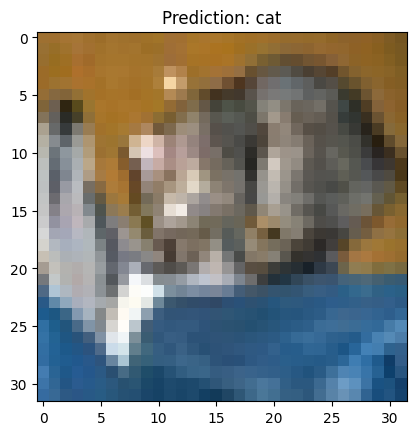

In [ ]:
# Step 5: Save Model and Make Predictions
print("Saving model and making predictions...")

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the trained model
model.save('models/cnn_model.h5')
print("Model saved to models/cnn_model.h5")

# Make predictions on test data
predictions = model.predict(x_test)

# Select a random sample for prediction visualization
sample_idx = np.random.randint(0, len(x_test))
sample_image = x_test[sample_idx]
sample_prediction = predictions[sample_idx]
sample_true_label = np.argmax(y_test[sample_idx])

# Get predicted class
predicted_class = np.argmax(sample_prediction)
confidence = sample_prediction[predicted_class]

# Display the prediction
plt.figure(figsize=(8, 4))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title(f'True: {class_names[sample_true_label]}\nPredicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}')
plt.axis('off')

# Show prediction probabilities
plt.subplot(1, 2, 2)
plt.bar(range(10), sample_prediction)
plt.title('Prediction Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.xticks(range(10), class_names, rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save prediction visualization
plt.savefig('results/sample_prediction.png', dpi=300, bbox_inches='tight')
print("Sample prediction saved to results/sample_prediction.png")

# Print summary
print(f"\nModel Summary:")
print(f"- Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"- Sample Prediction: {class_names[predicted_class]} (confidence: {confidence:.2f})")
print(f"- Model saved to: models/cnn_model.h5")
print(f"- Results saved to: results/ folder")
